In [3]:
import os

# Ruta relativa desde la carpeta del modelo al archivo CSV
file_path = '../data/processed/Provincial/df_final_provincial.csv'

# Comprobar si el archivo existe
if os.path.exists(file_path):
    print("El archivo existe en la ruta especificada.")
else:
    print("El archivo no se encuentra en la ruta especificada.")

El archivo existe en la ruta especificada.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(file_path)

In [5]:
# Convertir la fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Descomponer la fecha en año y mes
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Codificar la columna 'provincia' como números usando LabelEncoder
le = LabelEncoder()
df['provincia_encoded'] = le.fit_transform(df['provincia'])

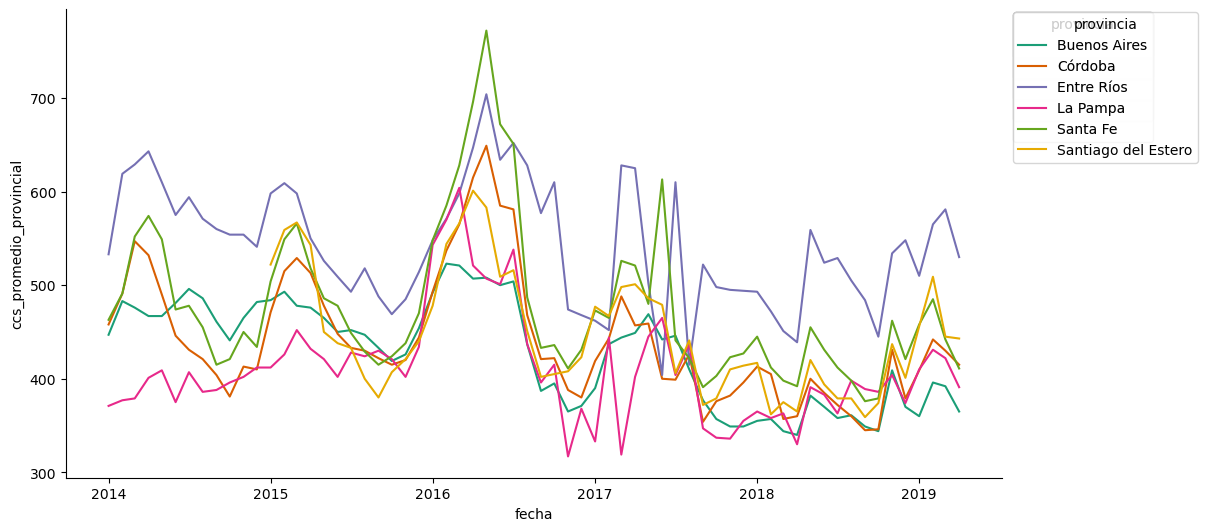

In [6]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha']
  ys = series['ccs_promedio_provincial']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('fecha', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('provincia')):
  _plot_series(series, series_name, i)
  fig.legend(title='provincia', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha')
_ = plt.ylabel('ccs_promedio_provincial')

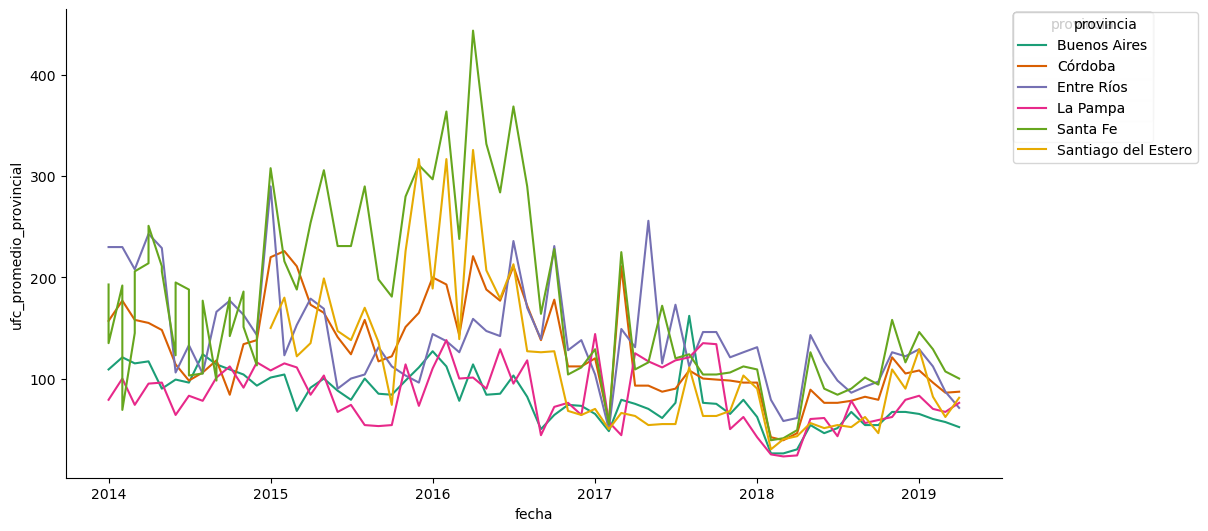

In [7]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha']
  ys = series['ufc_promedio_provincial']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('fecha', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('provincia')):
  _plot_series(series, series_name, i)
  fig.legend(title='provincia', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha')
_ = plt.ylabel('ufc_promedio_provincial')